# PCA and KMeans

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
headernames=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [4]:
dataset = pd.read_csv(path, names = headernames)
print(type(dataset))
dataset.head()

<class 'pandas.core.frame.DataFrame'>


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.drop(['Class'],axis=1,inplace=True)

In [6]:
dataset

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(dataset)
print(scaled)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [9]:
pca=PCA()

In [10]:
pca.fit(scaled)
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [11]:
pca.explained_variance_ratio_.cumsum()

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

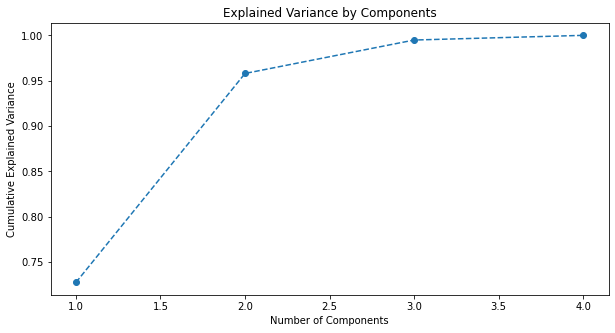

In [12]:
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % - 90% of the explained variance.
plt.figure(figsize=(10,5))
 
plt.plot (range (1,5), pca.explained_variance_ratio_.cumsum (), marker = 'o', linestyle = '--')
 
plt.title('Explained Variance by Components')
 
plt.xlabel('Number of Components')
 
plt.ylabel('Cumulative Explained Variance')

In [13]:
pca=PCA(n_components=2)

In [14]:
pca.fit(scaled)
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [15]:
df=pca.transform(scaled)
print(df)

#------------------------#
df1=np.transpose(df)
PCA1=df1[0]
PCA2=df1[1]

[[-2.26454173e+00  5.05703903e-01]
 [-2.08642550e+00 -6.55404729e-01]
 [-2.36795045e+00 -3.18477311e-01]
 [-2.30419716e+00 -5.75367713e-01]
 [-2.38877749e+00  6.74767397e-01]
 [-2.07053681e+00  1.51854856e+00]
 [-2.44571134e+00  7.45626750e-02]
 [-2.23384186e+00  2.47613932e-01]
 [-2.34195768e+00 -1.09514636e+00]
 [-2.18867576e+00 -4.48629048e-01]
 [-2.16348656e+00  1.07059558e+00]
 [-2.32737775e+00  1.58587455e-01]
 [-2.22408272e+00 -7.09118158e-01]
 [-2.63971626e+00 -9.38281982e-01]
 [-2.19229151e+00  1.88997851e+00]
 [-2.25146521e+00  2.72237108e+00]
 [-2.20275048e+00  1.51375028e+00]
 [-2.19017916e+00  5.14304308e-01]
 [-1.89407429e+00  1.43111071e+00]
 [-2.33994907e+00  1.15803343e+00]
 [-1.91455639e+00  4.30465163e-01]
 [-2.20464540e+00  9.52457317e-01]
 [-2.77416979e+00  4.89517027e-01]
 [-1.82041156e+00  1.06750793e-01]
 [-2.22821750e+00  1.62186163e-01]
 [-1.95702401e+00 -6.07892567e-01]
 [-2.05206331e+00  2.66014312e-01]
 [-2.16819365e+00  5.52016495e-01]
 [-2.14030596e+00  3

In [16]:
print(PCA1)
print(PCA2)

[-2.26454173 -2.0864255  -2.36795045 -2.30419716 -2.38877749 -2.07053681
 -2.44571134 -2.23384186 -2.34195768 -2.18867576 -2.16348656 -2.32737775
 -2.22408272 -2.63971626 -2.19229151 -2.25146521 -2.20275048 -2.19017916
 -1.89407429 -2.33994907 -1.91455639 -2.2046454  -2.77416979 -1.82041156
 -2.2282175  -1.95702401 -2.05206331 -2.16819365 -2.14030596 -2.26879019
 -2.14455443 -1.8319381  -2.60820287 -2.43795086 -2.18867576 -2.2111199
 -2.04441652 -2.18867576 -2.4359522  -2.1705472  -2.28652724 -1.87170722
 -2.55783442 -1.96427929 -2.13337283 -2.07535759 -2.38125822 -2.39819169
 -2.22678121 -2.20595417  1.10399365  0.73248144  1.24210951  0.39730728
  1.07259395  0.38445815  0.74871508 -0.49786339  0.92622237  0.00496803
 -0.12469746  0.43873012  0.55163398  0.71716507 -0.03725838  0.87589054
  0.3480064   0.15339254  1.21530321  0.15694118  0.7382561   0.47236968
  1.22798821  0.62938105  0.7004728   0.87353699  1.25422219  1.35823985
  0.66212614 -0.04728151  0.12153421  0.01411823  0.

In [17]:
from sklearn.cluster import KMeans

In [18]:
sse=[]
kmeans=range(1,5)
for k in kmeans:
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

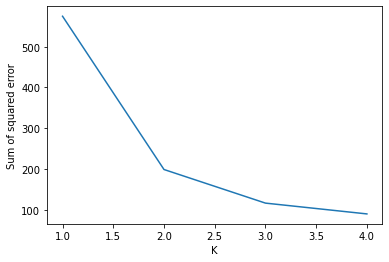

In [19]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(kmeans,sse)

In [20]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [21]:
km.cluster_centers_

array([[ 0.56713803, -0.8076751 ],
       [-2.22019328,  0.29222482],
       [ 1.72236912,  0.59990509]])

In [22]:
df_plot= pd.DataFrame()
df_plot['pca1']=np.transpose(PCA1)
df_plot['pca2']=np.transpose(PCA2)
df_plot['cluster']=y_predicted
df_plot

,pca1,pca2,cluster
0,-2.264542,0.505704,1
1,-2.086426,-0.655405,1
2,-2.367950,-0.318477,1
3,-2.304197,-0.575368,1
4,-2.388777,0.674767,1
...,...,...,...
145,1.870522,0.382822,2
146,1.558492,-0.905314,0
147,1.520845,0.266795,2
148,1.376391,1.016362,2


In [23]:
df_plot1 = df_plot[df_plot.cluster==0]
df_plot2 = df_plot[df_plot.cluster==1]
df_plot3 = df_plot[df_plot.cluster==2]

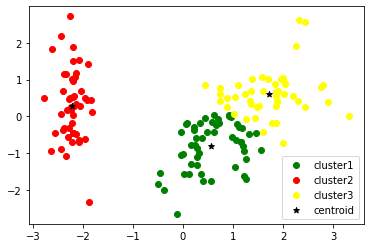

In [24]:
plt.scatter(df_plot1['pca1'],df_plot1['pca2'],color='green',label='cluster1')
plt.scatter(df_plot2['pca1'],df_plot2['pca2'],color='red',label='cluster2')
plt.scatter(df_plot3['pca1'],df_plot3['pca2'],color='yellow',label='cluster3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()